In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.metrics import confusion_matrix, accuracy_score

2024-05-29 08:51:26.711464: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
os.environ['TF_CPP_MIN_LEVEL']='3'
#silence errors only

In [3]:
(x_train , y_train ), (x_test , y_test)=mnist.load_data()

In [4]:
#we want a standard format [0,1] for all pixels // 0-255
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
#one-hot encoding // each class to a binary format // here we have 10 classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Split training data to training and val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'), 
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

2024-05-29 09:00:52.082348: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
# Compile the model 
#adam :weights,bias,  loss calculate:with categorical for multi classes metrics for fitness ?/ corrects/ all samples
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
trained_model = model.fit( x_train, y_train, epochs=10,batch_size=32, verbose=2, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 - 37s - loss: 0.2053 - accuracy: 0.9384 - val_loss: 0.1089 - val_accuracy: 0.9673 - 37s/epoch - 24ms/step
Epoch 2/10
1500/1500 - 21s - loss: 0.0849 - accuracy: 0.9738 - val_loss: 0.0920 - val_accuracy: 0.9737 - 21s/epoch - 14ms/step
Epoch 3/10
1500/1500 - 30s - loss: 0.0591 - accuracy: 0.9807 - val_loss: 0.0886 - val_accuracy: 0.9747 - 30s/epoch - 20ms/step
Epoch 4/10
1500/1500 - 17s - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0830 - val_accuracy: 0.9783 - 17s/epoch - 11ms/step
Epoch 5/10
1500/1500 - 26s - loss: 0.0353 - accuracy: 0.9881 - val_loss: 0.0840 - val_accuracy: 0.9770 - 26s/epoch - 17ms/step
Epoch 6/10
1500/1500 - 20s - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.0959 - val_accuracy: 0.9779 - 20s/epoch - 14ms/step
Epoch 7/10
1500/1500 - 16s - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.1011 - val_accuracy: 0.9774 - 16s/epoch - 10ms/step
Epoch 8/10
1500/1500 - 22s - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.1146 - val_accuracy: 0.9762 - 22s/ep

313/313 [==============================] - 3s 10ms/step - loss: 0.0939 - accuracy: 0.9780
Test accuracy: 0.9779999852180481
test_loss:0.09386945515871048
313/313 [==============================] - 2s 5ms/step
Per-class accuracy: 978.0


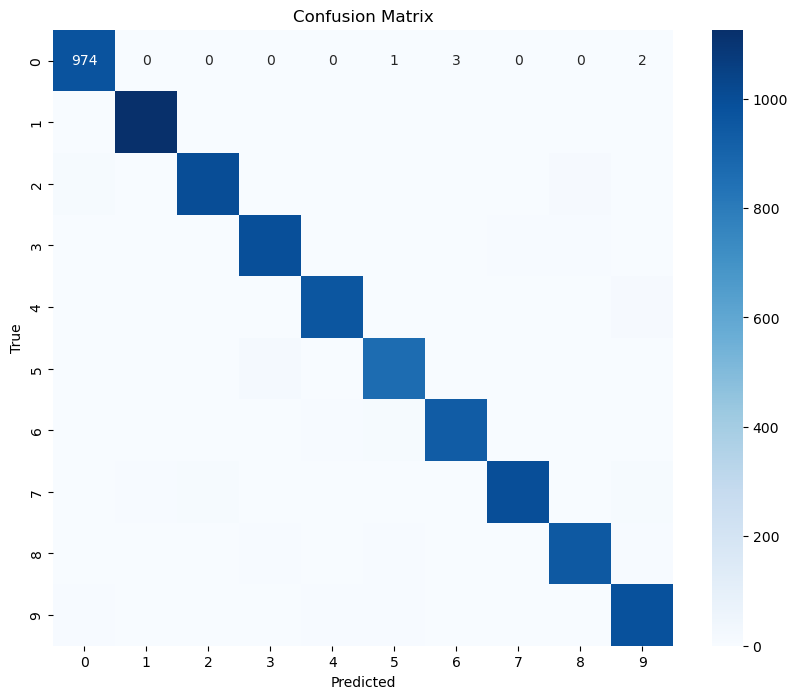

In [11]:
# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')
print(f'test_loss:{test_loss}')

# Predict the labels for the test set
y_model = model.predict(x_test)
y_model_classes = np.argmax(y_model, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate per-class accuracy
per_class_accuracy = accuracy_score(y_true_classes, y_model_classes, normalize=False) / len(np.unique(y_true_classes))
print(f'Per-class accuracy: {per_class_accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_model_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
